In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import networkx as nx
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [15]:
df = pd.read_csv('/Users/alisoliman/Downloads/masr elraqmia/labs/final project/Breast cancer Project/Breast Cancer.csv')
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [16]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [18]:
X = df.drop('diagnosis',axis=1)
y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [19]:

def cap_outliers(df):
    df_capped = df.copy()  
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_capped[column] = np.where(df_capped[column] < lower_bound, lower_bound, df_capped[column])
        
        df_capped[column] = np.where(df_capped[column] > upper_bound, upper_bound, df_capped[column])
    
    return df_capped
X_train_capped = cap_outliers(X_train)
X_test_capped = cap_outliers(X_test)
X_train_capped


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.50,0.10660,0.141300,0.286895,0.04375,0.211100,0.078782,...,10.3100,22.65,65.50,324.700,0.14820,0.436500,0.793175,0.17500,0.420125,0.11750
181,21.090,26.57,142.70,1288.55,0.11410,0.233915,0.248700,0.14960,0.239500,0.073980,...,26.4425,33.48,176.50,1804.075,0.14910,0.636575,0.678000,0.29030,0.409800,0.12360
63,9.173,13.86,59.20,260.90,0.07721,0.087510,0.059880,0.02180,0.234100,0.069630,...,10.0100,19.23,65.59,310.100,0.09836,0.167800,0.139700,0.05087,0.328200,0.08490
248,10.650,25.22,68.01,347.00,0.09657,0.072340,0.023790,0.01615,0.189700,0.063290,...,12.2500,35.19,77.98,455.700,0.14990,0.139800,0.112500,0.06136,0.340900,0.08147
60,10.170,14.88,64.55,311.90,0.11340,0.080610,0.010840,0.01290,0.246725,0.069600,...,11.0200,17.45,69.86,368.600,0.12750,0.098660,0.021680,0.02579,0.355700,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.00,0.09783,0.153100,0.086060,0.02872,0.190200,0.078782,...,9.7330,15.67,62.56,284.400,0.12070,0.243600,0.143400,0.04786,0.225400,0.10840
106,11.640,18.33,75.17,412.50,0.11420,0.101700,0.070700,0.03485,0.180100,0.065200,...,13.1400,29.26,85.51,521.700,0.16880,0.266000,0.287300,0.12180,0.280600,0.09097
270,14.290,16.82,90.30,632.60,0.06429,0.026750,0.007250,0.00625,0.150800,0.053760,...,14.9100,20.65,94.44,684.600,0.08567,0.050360,0.038660,0.03333,0.245800,0.06120
435,13.980,19.62,91.12,599.50,0.10600,0.113300,0.112600,0.06463,0.166900,0.065440,...,17.0400,30.80,113.90,869.300,0.16130,0.356800,0.406900,0.18270,0.317900,0.10550


In [20]:
lg_model = LogisticRegression(max_iter= 10000)
lg_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [21]:
# accuracy on training data
X_train_prediction = lg_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9604395604395605


In [22]:
# accuracy on test data
X_test_prediction = lg_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)

Accuracy on test data =  0.956140350877193


In [23]:
y_pred = lg_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [24]:
f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred, target_names=["Benign", "Malignant"])

print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Classification Report:\n", report)

F1 Score: 0.9398
Recall: 0.9070
Classification Report:
               precision    recall  f1-score   support

      Benign       0.95      0.99      0.97        71
   Malignant       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



F1 Score: 0.9302
Recall: 0.9302
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



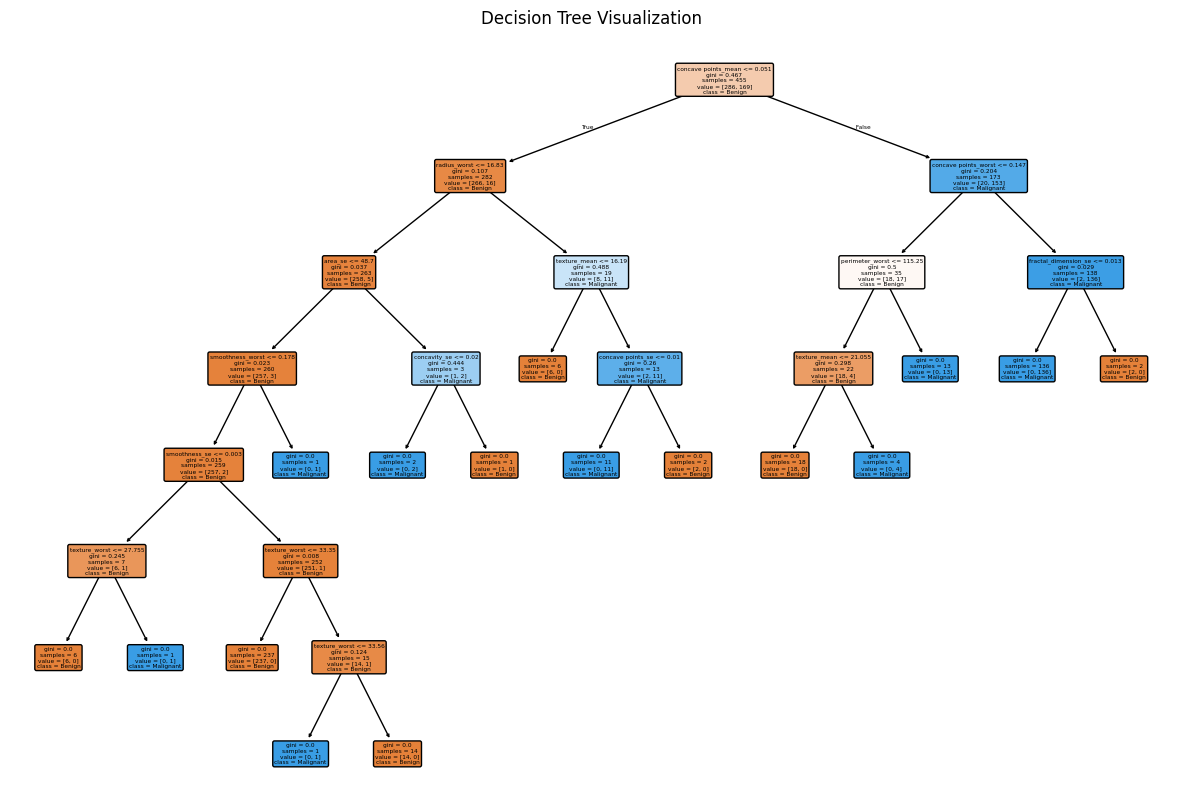

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)
y_pred = dt_model.predict(X_test)


f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
report = classification_report(Y_test, y_pred, target_names=["Benign", "Malignant"])
print(report)
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=["Benign", "Malignant"], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Best parameters: {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.96

F1 Score: 0.9398
Recall: 0.9070
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[70  1]
 [ 4 39]]


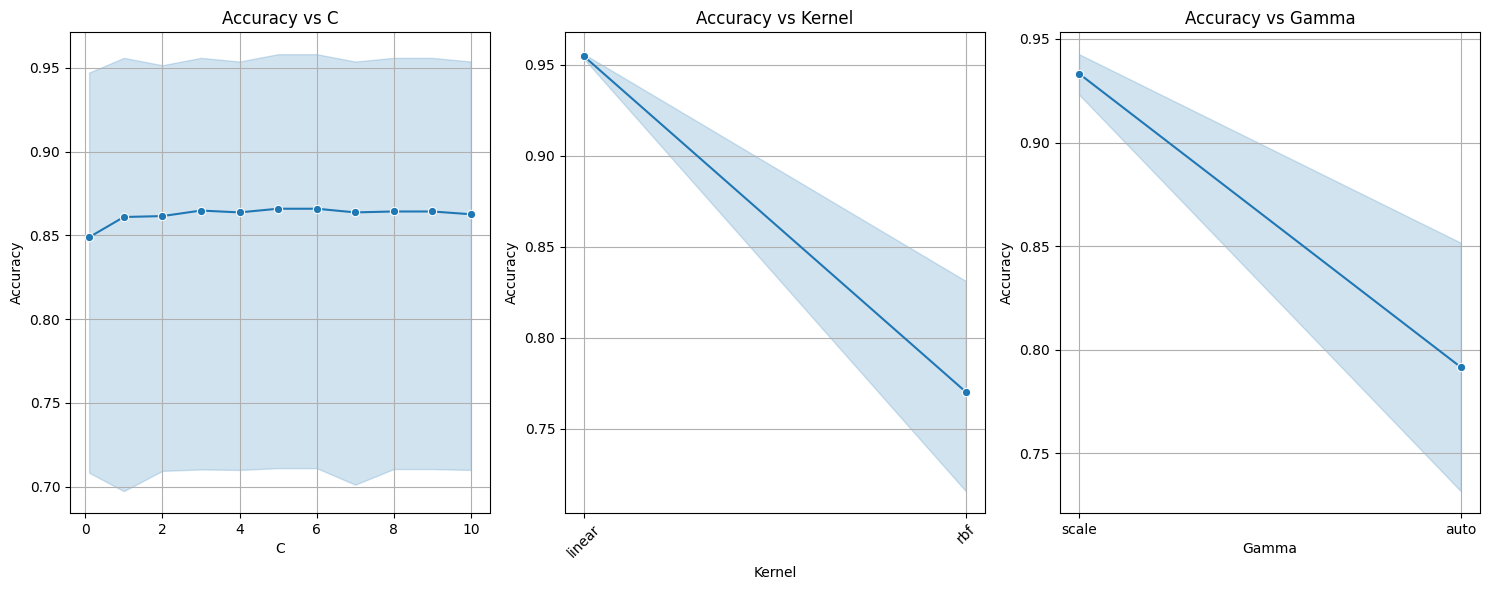

In [26]:
param_grid = {
    'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] 
}

grid_search = GridSearchCV(
    SVC(random_state=42),  
    param_grid, 
    cv=5, 
    scoring='accuracy',
    error_score='raise'  
)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

svc = SVC(probability=True, random_state=42, **best_params)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)

f1 = f1_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
print(f"\nF1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

results = pd.DataFrame(grid_search.cv_results_)

mean_test_scores = results['mean_test_score']
param_C = results['param_C'].astype(float)
param_kernel = results['param_kernel']
param_gamma = results['param_gamma']

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.lineplot(x=param_C, y=mean_test_scores, marker='o')
plt.title("Accuracy vs C")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.grid()

plt.subplot(1, 3, 2)
sns.lineplot(x=param_kernel, y=mean_test_scores, marker='o')
plt.title("Accuracy vs Kernel")
plt.xlabel("Kernel")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.grid()

plt.subplot(1, 3, 3)
sns.lineplot(x=param_gamma, y=mean_test_scores, marker='o')
plt.title("Accuracy vs Gamma")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.grid()

plt.tight_layout()
plt.show()

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

rf_predictions = rf_model.predict(X_test)

f1 = f1_score(Y_test, rf_predictions)
recall = recall_score(Y_test, y_pred)
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print("Accuracy:", accuracy_score(Y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(Y_test, rf_predictions))

F1 Score: 0.9524
Recall: 0.9070
Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [28]:
with open('rf_model.pkl', 'wb') as f1:
    pickle.dump(rf_model, f1)

with open('lg_model.pkl', 'wb') as f2:
    pickle.dump(lg_model, f2)    

with open('svm_model.pkl', 'wb') as f3:
    pickle.dump(svc, f3) 
    
with open('dt_model.pkl', 'wb') as f4:
    pickle.dump(dt_model, f4)      